In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.integrate import solve_ivp

: 

In [108]:
def model(t, y, params): # not sure about having to include rates here

    # LHS
    r, et, em, q, si, a, mr, mt, mm, mq, cr, ct, cm, cq = y
    # r = y[0] # free ribosomes
    # et = y[1] # transporter enzyme 
    # em = y[2] # metabolism enzyme 
    # q = y[3] # house-keeping proteins
    # si = y[4] # internal nutrient 
    # a = y[5] # energy
    # mr = y[6] # free mRNA for ribosome
    # mt = y[7] # free mRNA for transporter enzyme
    # mm = y[8] # free mRNA for metabolism enzyme
    # mq = y[9] # free mRNA for house-keeping proteins
    # cr = y[10] # ribosome bound mRNA for free ribosome
    # ct = y[11] # ribosome bound mRNA for transporter enzyme
    # cm = y[12] # ribosome bound mRNA for metabolism enzyme
    # cq = y[13] # ribosome bound mRNA for house-keeping proteins

    s, dm, ns, nr, nx, gmax, Kp, Kt, Km, wr, we, thetax, thetar, Kq, hq, kb, ku, M, kcm, dm, kb, ku, wx, vx, nq = params
    # params
    # s = params[0] # external nutrient 
    # dm = params[1] # mRNA-degradation rate 
    # ns = params[2] # nutrient quality 
    # nr = params[3] # ribosome length 
    # nx = params[4] # length of nonribosomal proteins
    # gmax = params[5] # max. translational elongation rate 
    # Kp = params[6] # protein threshold - where did this come from? 
    # # vt = params[7] # max. nutrient import rate - should maybe be in rates?
    # Kt = params[7] # nutrient import threshold for transporter enzyme
    # # vm = params[9] # max. enzymatic rate - should maybe be in rates? 
    # Km = params[8] # enzymatic threshold for metabolic enzyme 
    # wr = params[9] # max. ribosome transcription rate
    # we = params[10] # max. enzyme transcription rate2
    # wq = params[11] # max. q-transcription rate 
    # thetar = params[12] # ribosome transcription threshold 
    # thetax = params[13] # non-ribosomal transcription threshold 
    # Kq = params[14] # q-autoinhibition threshold 
    # hq = params[15] # q-autoinhbition Hill coeff.
    # kb = params[16] # mRNA-ribosome binding rate 
    # ku = params[17] # mRNA-ribosome unbinding rate 
    # M = params[18] # total cell mass 
    # kcm = params[19] # chloramphenicol binding rate 

    
    # # rates
    # # lam = rates[0] # dilution
    # dm = rates[1] # degradation
    # kb = rates[2] # ribosome binding 
    # ku = rates[3] # ribosome unbinding 
    # wx = rates[4] # transcription
    # vx = rates[5] # translation



    # equations
    Kgamma = gmax/Kp # threshold for half maximal elongation - not sure about value or equation for Kp
    gamma = (gmax*a)/(Kgamma+a) # rate of translational elongation 
    vimp = (et*vt*s0)/(Kt*s0) # transporter enzyme kinetics 
    nucat = (em*vm*si)/(Km+si) # metabolic enzyme kinetics
    ttrate = (cr + cq + ct + cm)*gamma
    lam = ttrate/M

    # RHS (dydt)
    dydt = np.zeros(14)
    # # first reaction - dilution
    # dydt[0] = dydt[0] - (r*lam)
    # dydt[1] = dydt[1] - (et*lam)
    # dydt[2] = dydt[2] - (em*lam)
    # dydt[3] = dydt[3] - (q*lam)
    # dydt[4] = dydt[4] - (si*lam)
    # dydt[5] = dydt[5] - (a*lam)
    
    # # second reaction - transcription
    # dydt[4] = dydt[4] + (s*(vimp)) 
    # dydt[6] = dydt[6] + ((wr*a)/thetax+a)
    # dydt[7] = dydt[7] + ((we*a)/thetax+a)
    # dydt[8] = dydt[8] + ((we*a)/thetax+a)
    # dydt[9] = dydt[9] + ((wq*a)/thetax+a)*(1/1+((q/Kq)**hq)) 
    
    # # third reaction - dilution/degradation
    # dydt[6] = dydt[6] - (mr*(lam+dm))
    # dydt[7] = dydt[7] - (mt*(lam+dm))
    # dydt[8] = dydt[8] - (mm*(lam+dm))
    # dydt[9] = dydt[9] - (mq*(lam+dm))
    # dydt[4] = dydt[4] - (si*nucat) 
        
    # # fourth reaction - ribosome binding 
    # dydt[0] = dydt[0] - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb)
    # dydt[6] = dydt[6] - (r*mr*kb)
    # dydt[7] = dydt[7] - (r*mt*kb)
    # dydt[8] = dydt[8] - (r*mm*kb)
    # dydt[9] = dydt[9] - (r*mq*kb)
    # dydt[10] = dydt[10] + (r*mr*kb)
    # dydt[11] = dydt[11] + (r*mt*kb)
    # dydt[12] = dydt[12] + (r*mm*kb)
    # dydt[13] = dydt[13] + (r*mq*kb)
    
    # # fifth reaction - ribosome unbinding 
    # dydt[0] = dydt[0] + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku)
    # dydt[6] = dydt[6] + (cr*ku)
    # dydt[7] = dydt[7] + (ct*ku)
    # dydt[8] = dydt[8] + (cm*ku)
    # dydt[9] = dydt[9] + (cq*ku)
    # dydt[10] = dydt[10] - (cr*ku)
    # dydt[11] = dydt[11] - (ct*ku)
    # dydt[12] = dydt[12] - (cm*ku)
    # dydt[13] = dydt[13] - (cq*ku)
    
    # # sixth reaction - dilution
    # dydt[10] = dydt[10] - (cr*lam)
    # dydt[11] = dydt[11] - (ct*lam)
    # dydt[12] = dydt[12] - (cm*lam)
    # dydt[13] = dydt[13] - (cq*lam)
    
    # # seventh reaction - translation 
    # dydt[0] = dydt[0] + (cr*(gamma/nr)) + (ct*(gamma/nx)) + (cm*(gamma/nx)) + (cq*(gamma/nx)) + (cr*(gamma/nr))
    # dydt[6] = dydt[6] + (cr*(gamma/nr))
    # dydt[7] = dydt[7] + (ct*(gamma/nx))
    # dydt[8] = dydt[8] + (cm*(gamma/nx))
    # dydt[9] = dydt[9] + (cq*(gamma/nx))
    # dydt[1] = dydt[1] + (ct*(gamma/nx))
    # dydt[2] = dydt[2] + (cm*(gamma/nx))
    # dydt[3] = dydt[3] + (cq*(gamma/nx))
    # dydt[10] = dydt[10] - (cr*(gamma/nr))
    # dydt[11] = dydt[11] - (ct*(gamma/nx))
    # dydt[12] = dydt[12] - (cm*(gamma/nx))
    # dydt[13] = dydt[13] - (cq*(gamma/nx))
    # dydt[5] = dydt[5] - (cr*(gamma/nr)) - (ct*(gamma/nx)) - (cm*(gamma/nx)) - (cq*(gamma/nx))
    r, et, em, q, si, a, mr, mt, mm, mq, cr, ct, cm, cq = y
    # # final odes
    dydt[0] = - (r*lam) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cr*(gamma/nr)) + (ct*(gamma/nx)) + (cm*(gamma/nx)) + (cq*(gamma/nx)) + (cr*(gamma/nr))
    dydt[1] = - (et*lam) + (ct*(gamma/nx))
    dydt[2] = - (em*lam) + (cm*(gamma/nx))
    dydt[3] = - (q*lam) + (cq*(gamma/nx))
    dydt[4] = - (si*lam) + vimp - nucat 
    dydt[5] = + (ns*nucat) - ttrate - (lam*a) # - (a*lam) - (cr*(gamma/nr)) - (ct*(gamma/nx)) - (cm*(gamma/nx)) - (cq*(gamma/nx))
    dydt[6] = + ((wr*a)/thetar+a) - (mr*(lam+dm)) - (r*mr*kb) + (cr*ku) + (cr*(gamma/nr))
    dydt[7] = + ((we*a)/thetax+a) - (mt*(lam+dm)) - (r*mt*kb) + (ct*ku) + (ct*(gamma/nx))
    dydt[8] = + ((we*a)/thetax+a) - (mm*(lam+dm)) - (r*mm*kb) + (cm*ku) + (cm*(gamma/nx))
    dydt[9] = + ((wq*a)/thetax+a)/(1+((q/Kq)**nq)) - (mq*(lam+dm)) - (r*mq*kb) + (cq*ku) + (cq*(gamma/nx))
    dydt[10] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*(gamma/nr)) # - f*cr and + b*zmr added in
    dydt[11] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*(gamma/nx))
    dydt[12] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*(gamma/nx))
    dydt[13] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*(gamma/nx))

    return dydt

In [105]:
# rates
lam = 2 
vimp = 2 
dm = 1
kb = 1
ku = 1
wx = 1
vx = 10

rates = [lam, vimp, dm, kb, ku, wx, vx]

In [106]:
# params
s0 = 1e4
dm = 0.1
ns = 0.5
nr = 7459 
nx = 300
gmax = 1260
Kgamma = 7
vt = 726 
Kt = 1000
vm = 5800
Km = 1000 
wr = 930
we = 4.14
wq = 948.93
thetar = 426.87
thetax = 4.38
Kq = 152219
hq = 4
kb = 1
ku = 1
M = 1e8
kcm = 0.00599
Kp =1
nq = 4
params = [s, dm, ns, nr, nx, gmax, Kp, Kt, Km, wr, we, thetar, thetax, Kq, hq, kb, ku, M, kcm, dm, kb, ku, wx, vx, nq]

In [88]:
print((params))

[10000.0, 0.1, 0.5, 7459, 300, 1260, 1, 1000, 1000, 930, 4.14, 1, 152219, 4, 1, 1, 100000000.0, 0.00599, 0.1, 1, 1, 1, 10]


In [70]:
# initial values
r_0 = 0
et_0 = 0
em_0 = 0
q_0 = 0
si_0 = 0
a_0 = 0
mr_0 = 0
mt_0 = 0
mm_0 = 0
mq_0 = 0
cr_0 = 0
ct_0 = 0
cm_0 = 0
cq_0 = 0
init = [r_0, et_0, em_0, q_0, si_0, a_0, mr_0, mt_0, mm_0, mq_0, cr_0, ct_0, cm_0, cq_0]

In [66]:
tspan = np.arange(0, 1000)
print(Kq)

152219


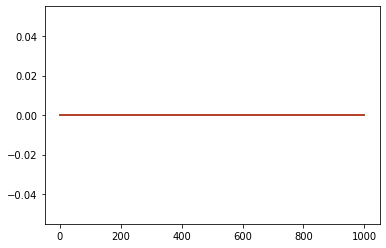

In [109]:
sol = solve_ivp(model, [0, 1000], init, args=(params,), method='Radau')

plt.plot(sol.t, sol.y.T)

In [56]:
print(len(sol.t))
print(len(sol.y))

8
14


In [35]:
nutrient = np.arange(1, 1001)


In [ ]:
for s0 in nutrient:
    solve_ivp(lambda t, y: model(t, y, params, rates)), tspan, init, method='Radau'
    gamma = (gmax*a)/(Kgamma+a) # rate of translational elongation 
    ttrate = (cr) + cq + ct + cm)*gamma
    lam = ttrate/M